<br><p style="font-size:250%;text-align:center;color:#002233">Analyse de régression du football européen  <br><br> avec scikit-learn </p><br>

<h1 style="font-size:200%;color:#00334d"> <b>EDA: Exploration et analyse des données </b> </h1>

## Description des données

Ce dataset <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> contient plus de 25,000 matches et plus de 10,000  joueurs professionnels du football européen (saisons entre 2008 et 2016).

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Creer une connexion .
cnx = sqlite3.connect('soccer/database.sqlite')

In [3]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.shape

(183978, 42)

In [6]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

En suivant le tutoriel : https://www.kaggle.com/harunshimanto/introduction-to-data-science-with-data-science-ai

### Statistiques

In [7]:
#descriptive statistics summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

Les colonnes que nous allons utilisees pour l'entrainement et prediction :

In [9]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

Ce qu'on doit predire :

In [10]:
target = ['overall_rating']

## Nettoyage des données 

On repere les colonnes contenant des valeurs nulles:

In [11]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

C'est seulement les 4 premiers ou nos donnees ne contiennent pas de valeurs nulles ou manquantes. Essayons de voir combien de valeurs nulles nous avons par colonne.

In [12]:
df.isnull().sum(axis=0).sort_values(ascending=False)

attacking_work_rate    3230
volleys                2713
agility                2713
balance                2713
sliding_tackle         2713
jumping                2713
vision                 2713
curve                  2713
gk_reflexes             836
long_passing            836
free_kick_accuracy      836
dribbling               836
heading_accuracy        836
short_passing           836
acceleration            836
finishing               836
crossing                836
defensive_work_rate     836
preferred_foot          836
potential               836
overall_rating          836
ball_control            836
sprint_speed            836
gk_positioning          836
positioning             836
gk_kicking              836
gk_handling             836
gk_diving               836
standing_tackle         836
marking                 836
reactions               836
penalties               836
interceptions           836
aggression              836
long_shots              836
strength            

On va supprimer les valeurs nulles et voir combien on aura perdu.

In [13]:
df_cleaned = df.copy()

In [14]:
df_cleaned.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
#Clean our data by deleting null values
rows = df_cleaned.shape[0]
df_cleaned=df_cleaned.dropna()
#Check if there are any null values left and how many rows where left
print(rows)
df_cleaned.isnull().any().any(), df_cleaned.shape

183978


(False, (180354, 42))

In [16]:
#To know how many values where deleted 
rows - df_cleaned.shape[0]

3624

In [17]:
( 3624/ 183978) * 100

1.9698007370446464

On n'a presque rien perdu, ce qui est bien.

In [18]:
df_cleaned.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [19]:
df.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


## Analyse des données

In [20]:
df_cleaned[:10][['overall_rating']]

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
5,74.0
6,74.0
7,73.0
8,73.0
9,73.0


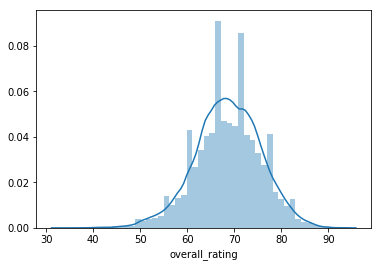

In [21]:
#histogram
sns.distplot(df_cleaned['overall_rating']);

- Notre distribution devie de la moyenne (n'est pas une distribtion qui suit la loi normale)
- On pourrait avoir des valeurs aberrantes

In [22]:
#skewness and kurtosis
print("Skewness: %f" % df_cleaned['overall_rating'].skew())
print("Kurtosis: %f" % df_cleaned['overall_rating'].kurt())

Skewness: -0.200925
Kurtosis: 0.275974


### Correlation matrix (heatmap style)

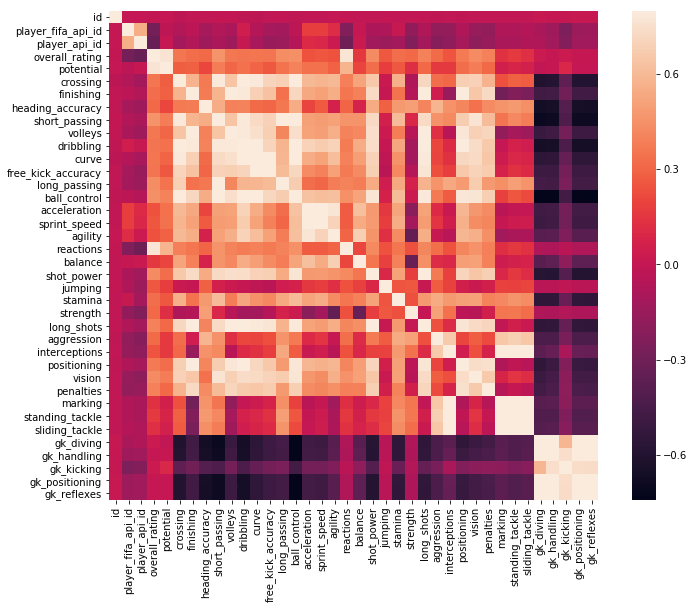

In [23]:
#correlation matrix
corrmat = df_cleaned.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

On a plusieurs correlations entre attributs. Nous allons nous concentrer sur 'overall_rating' et on reviendra analyser les autres.

### 'overall_rating' correlation matrix (zoomed heatmap style)

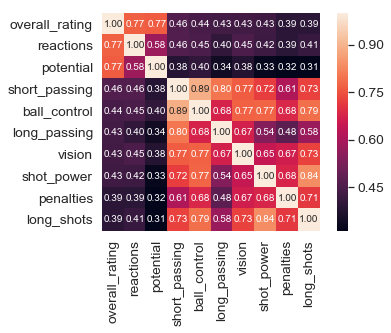

In [24]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'overall_rating')['overall_rating'].index
cm = np.corrcoef(df_cleaned[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- Nous avons de tres interessante dependance entre nos varaibles comme `short_passing` et `long_passing`.
- Notre variable `overall_rating` à l'air d'etre influencé par : `potential` et `reactions`

### Scatter plots entre 'overall_rating' et des varaibles correlés

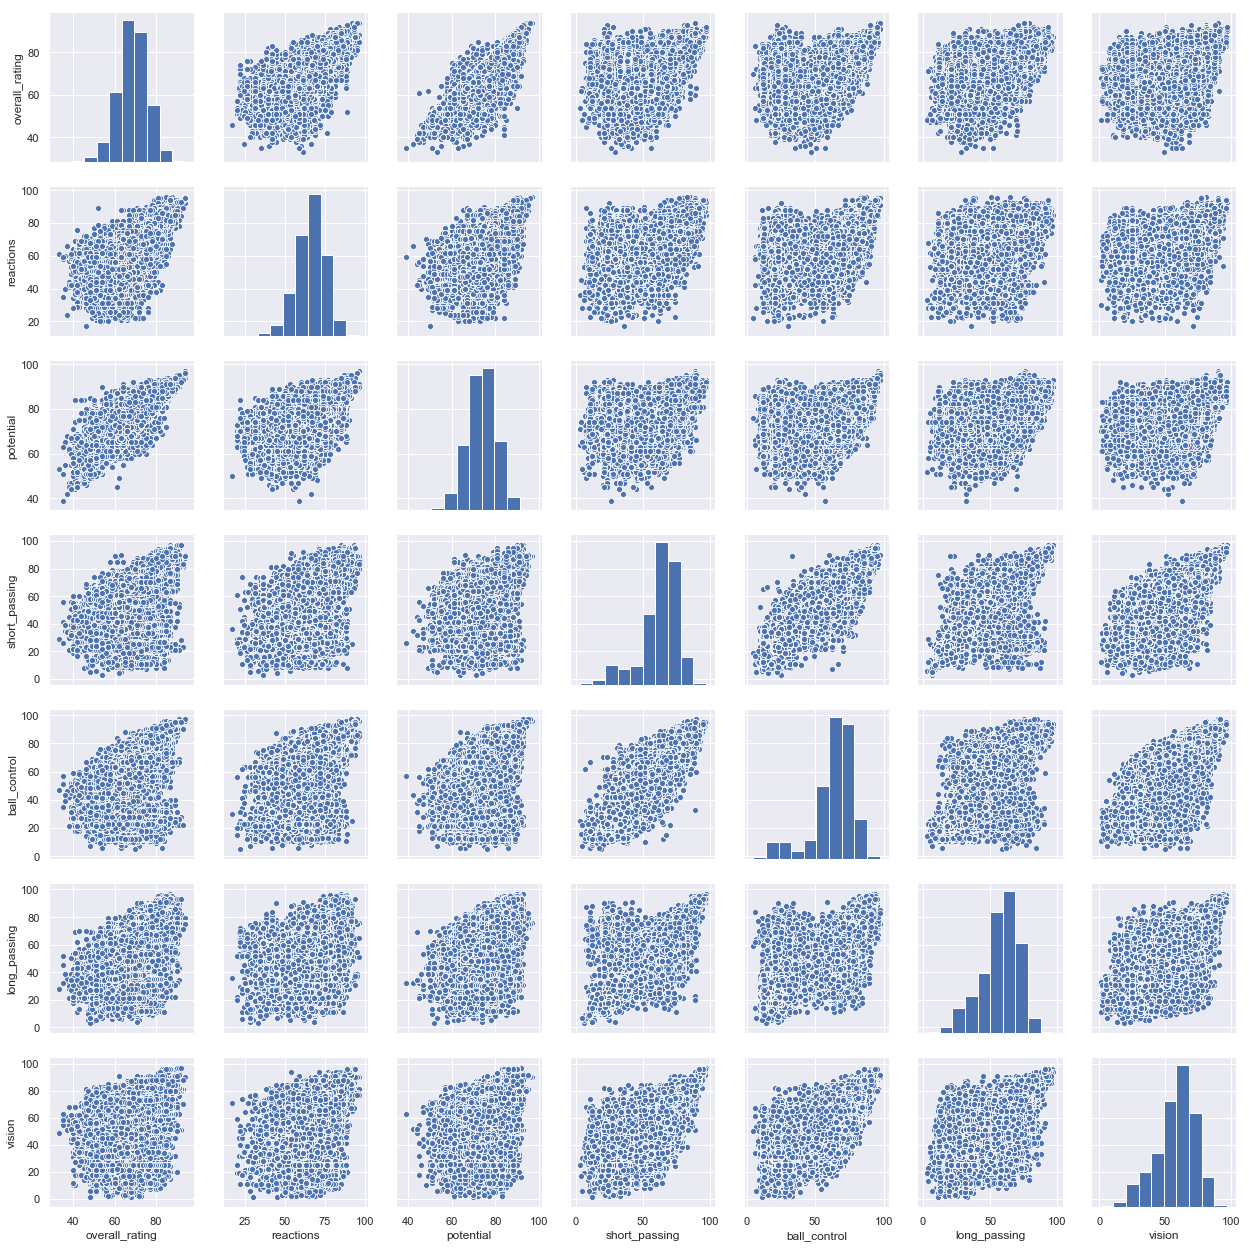

In [25]:
#scatterplot
sns.set()
cols = ['overall_rating', 'reactions', 'potential', 'short_passing', 'ball_control', 'long_passing', 'vision']
sns.pairplot(df_cleaned[cols], size = 2.5)
plt.show();

Voici les correlations remarqué:
* Overall_rating & potential
* Overall_rating & reactions
* short_passing & ball_control
* ball_control & vision
* short_passing & vision
* long_passing & vision
* short_passing & ball_control

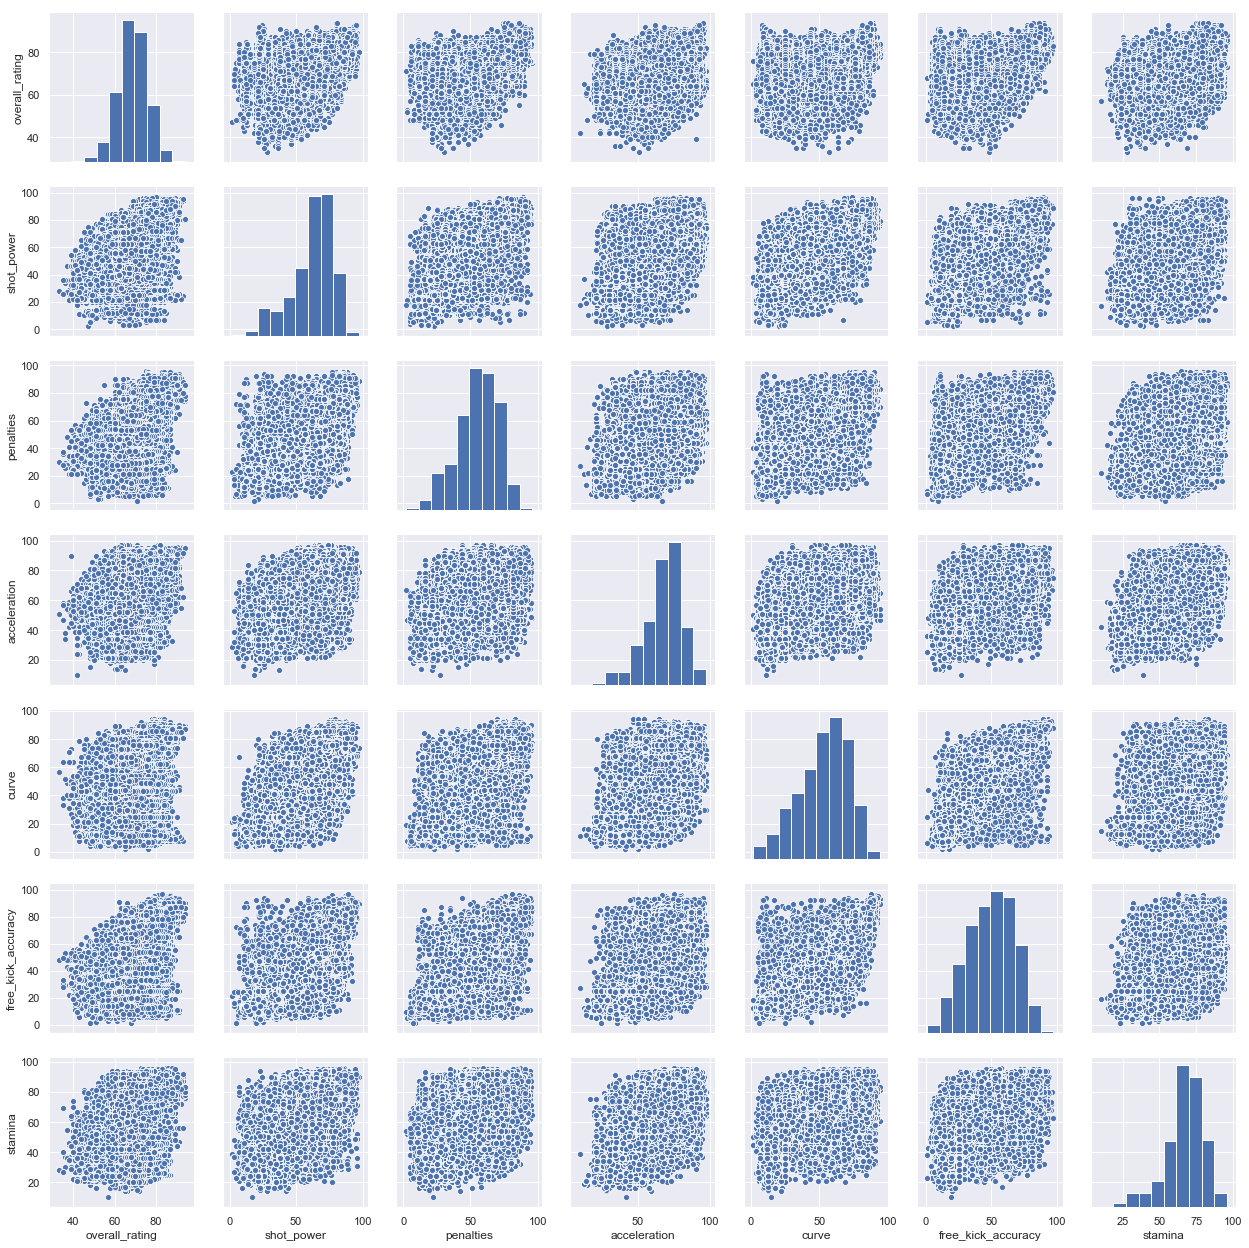

In [26]:
#scatterplot
sns.set()
cols = ['overall_rating', 'shot_power', 'penalties', 'acceleration', 'curve', 'free_kick_accuracy', 'stamina']
sns.pairplot(df_cleaned[cols], size = 2.5)
plt.show();

In [27]:
correlation_matrix  = df_cleaned.corr()
correlation_matrix["overall_rating"].sort_values(ascending=False)
df_cleaned.drop(columns=['gk_kicking', 'gk_diving', 'gk_positioning', 'gk_reflexes', 'gk_handling'], axis=1, inplace=True)

In [28]:
df_cleaned.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [29]:
correlation_matrix  = df_cleaned.corr()
correlation_matrix["overall_rating"].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
id                   -0.003738
player_fifa_api_id   -0.278703
player_a

<h1 style="font-size:200%;color:#00334d"> <b>Préparation de données pour l'apprentissage </b> </h1>

## Features 

In [30]:
df_cleaned.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0


In [31]:
#convert categorical variable into dummy
col_drop = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
df_cleaned = df_cleaned.drop(columns=col_drop, axis=1)

In [32]:
df_cleaned = df_cleaned.drop('date', axis=1)
df_cleaned.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0


Extraire les caractéristiques et les valeurs de la cible ('overall_rating') vers un Dataframes séparé

In [33]:
X = df_cleaned.drop('overall_rating', axis=1)

In [34]:
y = df_cleaned[target]

In [35]:
X.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'potential', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [36]:
X.shape

(180354, 32)

In [37]:
y.shape

(180354, 1)

In [38]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
scaler.fit(y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
X.head()

,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,1,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,2,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,3,218353,505942,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,4,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,5,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0


In [72]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


# Utilisation de Keras

In [39]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [96]:
import numpy as np

n_cols = X.shape[1]
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [97]:
model.compile(optimizer='adam', loss='mse')

In [99]:
model.fit(X, y, validation_split=0.3, epochs=1000)

Train on 126247 samples, validate on 54107 samples
Epoch 1/1000
126247/126247 [==============================] - 9s 69us/step - loss: 575.4333 - val_loss: 634.6999
Epoch 2/1000
126247/126247 [==============================] - 8s 64us/step - loss: 672.0753 - val_loss: 173.8882
Epoch 3/1000
126247/126247 [==============================] - 10s 79us/step - loss: 284.9593 - val_loss: 538.8084
Epoch 4/1000
126247/126247 [==============================] - 8s 67us/step - loss: 138.3738 - val_loss: 367.9832
Epoch 5/1000
126247/126247 [==============================] - 8s 65us/step - loss: 97.1825 - val_loss: 112.8385
Epoch 6/1000
126247/126247 [==============================] - 8s 65us/step - loss: 63.5623 - val_loss: 91.6622
Epoch 7/1000
126247/126247 [==============================] - 8s 65us/step - loss: 51.4161 - val_loss: 155.0378
Epoch 8/1000
126247/126247 [==============================] - 8s 66us/step - loss: 42.2526 - val_loss: 94.3638
Epoch 9/1000
126247/126247 [======================

Epoch 74/1000
126247/126247 [==============================] - 8s 62us/step - loss: 9.2770 - val_loss: 12.8952
Epoch 75/1000
126247/126247 [==============================] - 8s 63us/step - loss: 9.5490 - val_loss: 10.7156
Epoch 76/1000
126247/126247 [==============================] - 8s 62us/step - loss: 9.4646 - val_loss: 9.9001
Epoch 77/1000
126247/126247 [==============================] - 8s 62us/step - loss: 9.4794 - val_loss: 24.3265
Epoch 78/1000
126247/126247 [==============================] - 8s 64us/step - loss: 9.3680 - val_loss: 8.5752
Epoch 79/1000
126247/126247 [==============================] - 9s 68us/step - loss: 9.5831 - val_loss: 11.9325
Epoch 80/1000
126247/126247 [==============================] - 8s 66us/step - loss: 9.3881 - val_loss: 25.1396
Epoch 81/1000
126247/126247 [==============================] - 9s 68us/step - loss: 9.2711 - val_loss: 7.5018
Epoch 82/1000
126247/126247 [==============================] - 10s 78us/step - loss: 9.3784 - val_loss: 7.8657
Epoc

126247/126247 [==============================] - 7s 56us/step - loss: 7.6343 - val_loss: 6.1929
Epoch 148/1000
126247/126247 [==============================] - 7s 57us/step - loss: 7.4718 - val_loss: 15.3391
Epoch 149/1000
126247/126247 [==============================] - 7s 56us/step - loss: 7.6014 - val_loss: 16.9495
Epoch 150/1000
126247/126247 [==============================] - 8s 60us/step - loss: 7.5239 - val_loss: 20.0317
Epoch 151/1000
126247/126247 [==============================] - 9s 71us/step - loss: 7.4824 - val_loss: 10.6966
Epoch 152/1000
126247/126247 [==============================] - 10s 82us/step - loss: 7.5745 - val_loss: 8.7168
Epoch 153/1000
126247/126247 [==============================] - 8s 63us/step - loss: 7.2184 - val_loss: 22.6107
Epoch 154/1000
126247/126247 [==============================] - 8s 61us/step - loss: 7.7838 - val_loss: 7.2500
Epoch 155/1000
126247/126247 [==============================] - 8s 67us/step - loss: 7.5658 - val_loss: 9.5544
Epoch 156/

Epoch 221/1000
126247/126247 [==============================] - 8s 60us/step - loss: 5.9202 - val_loss: 6.0039
Epoch 222/1000
126247/126247 [==============================] - 7s 59us/step - loss: 5.9101 - val_loss: 6.2292
Epoch 223/1000
126247/126247 [==============================] - 8s 60us/step - loss: 5.8276 - val_loss: 7.6539
Epoch 224/1000
126247/126247 [==============================] - 8s 65us/step - loss: 5.8782 - val_loss: 14.3902
Epoch 225/1000
126247/126247 [==============================] - 8s 61us/step - loss: 5.8373 - val_loss: 5.6479
Epoch 226/1000
126247/126247 [==============================] - 8s 64us/step - loss: 5.9552 - val_loss: 5.4897
Epoch 227/1000
126247/126247 [==============================] - 7s 57us/step - loss: 5.7926 - val_loss: 6.1296
Epoch 228/1000
126247/126247 [==============================] - 7s 57us/step - loss: 5.8199 - val_loss: 11.5202
Epoch 229/1000
126247/126247 [==============================] - 7s 55us/step - loss: 5.8166 - val_loss: 6.0022

126247/126247 [==============================] - 6s 47us/step - loss: 5.5103 - val_loss: 6.1405
Epoch 295/1000
126247/126247 [==============================] - 8s 60us/step - loss: 5.4797 - val_loss: 6.3733
Epoch 296/1000
126247/126247 [==============================] - 8s 64us/step - loss: 5.4880 - val_loss: 5.0116
Epoch 297/1000
126247/126247 [==============================] - 8s 60us/step - loss: 5.4767 - val_loss: 7.6419
Epoch 298/1000
126247/126247 [==============================] - 8s 65us/step - loss: 5.4374 - val_loss: 5.2866
Epoch 299/1000
126247/126247 [==============================] - 7s 59us/step - loss: 5.5455 - val_loss: 6.2825
Epoch 300/1000
126247/126247 [==============================] - 8s 62us/step - loss: 5.4647 - val_loss: 6.0247
Epoch 301/1000
126247/126247 [==============================] - 9s 68us/step - loss: 5.5568 - val_loss: 5.2605
Epoch 302/1000
126247/126247 [==============================] - 8s 63us/step - loss: 5.4553 - val_loss: 6.5735
Epoch 303/1000
1

Epoch 368/1000
126247/126247 [==============================] - 7s 53us/step - loss: 5.2630 - val_loss: 4.7329
Epoch 369/1000
126247/126247 [==============================] - 6s 51us/step - loss: 5.2593 - val_loss: 5.2466
Epoch 370/1000
126247/126247 [==============================] - 7s 55us/step - loss: 5.2925 - val_loss: 4.9526
Epoch 371/1000
126247/126247 [==============================] - 7s 55us/step - loss: 5.3105 - val_loss: 6.7695
Epoch 372/1000
126247/126247 [==============================] - 7s 57us/step - loss: 5.2503 - val_loss: 7.0702
Epoch 373/1000
126247/126247 [==============================] - 7s 56us/step - loss: 5.3400 - val_loss: 9.5379
Epoch 374/1000
126247/126247 [==============================] - 7s 52us/step - loss: 5.3502 - val_loss: 4.9107
Epoch 375/1000
126247/126247 [==============================] - 7s 53us/step - loss: 5.3301 - val_loss: 15.3337
Epoch 376/1000
126247/126247 [==============================] - 7s 57us/step - loss: 5.2818 - val_loss: 4.6362


126247/126247 [==============================] - 6s 50us/step - loss: 5.1850 - val_loss: 7.4752
Epoch 442/1000
126247/126247 [==============================] - 6s 49us/step - loss: 5.1655 - val_loss: 9.7118
Epoch 443/1000
126247/126247 [==============================] - 6s 50us/step - loss: 5.2509 - val_loss: 4.7422
Epoch 444/1000
126247/126247 [==============================] - 6s 50us/step - loss: 5.1008 - val_loss: 4.4373
Epoch 445/1000
126247/126247 [==============================] - 7s 52us/step - loss: 5.2268 - val_loss: 4.9206
Epoch 446/1000
126247/126247 [==============================] - 7s 58us/step - loss: 5.1484 - val_loss: 5.2519
Epoch 447/1000
126247/126247 [==============================] - 7s 52us/step - loss: 5.2101 - val_loss: 5.4221
Epoch 448/1000
126247/126247 [==============================] - 7s 53us/step - loss: 5.1191 - val_loss: 5.9304
Epoch 449/1000
126247/126247 [==============================] - 6s 50us/step - loss: 5.1617 - val_loss: 4.5355
Epoch 450/1000
1

Epoch 515/1000
126247/126247 [==============================] - 7s 57us/step - loss: 5.0772 - val_loss: 8.2571
Epoch 516/1000
126247/126247 [==============================] - 8s 61us/step - loss: 5.1288 - val_loss: 7.9521
Epoch 517/1000
126247/126247 [==============================] - 7s 54us/step - loss: 5.0722 - val_loss: 7.2524
Epoch 518/1000
126247/126247 [==============================] - 14s 114us/step - loss: 5.1238 - val_loss: 5.9393
Epoch 519/1000
126247/126247 [==============================] - 9s 69us/step - loss: 5.1521 - val_loss: 5.7600
Epoch 520/1000
126247/126247 [==============================] - 6s 50us/step - loss: 5.0973 - val_loss: 5.0304
Epoch 521/1000
126247/126247 [==============================] - 9s 69us/step - loss: 5.0310 - val_loss: 4.5327
Epoch 522/1000
126247/126247 [==============================] - 9s 68us/step - loss: 5.1808 - val_loss: 5.3961
Epoch 523/1000
126247/126247 [==============================] - 8s 61us/step - loss: 5.0818 - val_loss: 6.1005

126247/126247 [==============================] - 12s 98us/step - loss: 5.0025 - val_loss: 4.5288
Epoch 589/1000
126247/126247 [==============================] - 10s 76us/step - loss: 5.0073 - val_loss: 5.4521
Epoch 590/1000
126247/126247 [==============================] - 8s 65us/step - loss: 5.0149 - val_loss: 6.8651
Epoch 591/1000
126247/126247 [==============================] - 8s 60us/step - loss: 5.0510 - val_loss: 5.5971
Epoch 592/1000
126247/126247 [==============================] - 9s 68us/step - loss: 5.0305 - val_loss: 4.7032
Epoch 593/1000
126247/126247 [==============================] - 9s 75us/step - loss: 4.9944 - val_loss: 6.0411
Epoch 594/1000
126247/126247 [==============================] - 10s 82us/step - loss: 5.0362 - val_loss: 5.7403
Epoch 595/1000
126247/126247 [==============================] - 10s 79us/step - loss: 5.0697 - val_loss: 5.2047
Epoch 596/1000
126247/126247 [==============================] - 9s 75us/step - loss: 4.9932 - val_loss: 6.9406
Epoch 597/10

Epoch 662/1000
126247/126247 [==============================] - 7s 52us/step - loss: 4.9089 - val_loss: 5.9661
Epoch 663/1000
126247/126247 [==============================] - 6s 49us/step - loss: 4.9624 - val_loss: 5.5917
Epoch 664/1000
126247/126247 [==============================] - 6s 49us/step - loss: 4.9429 - val_loss: 7.7514
Epoch 665/1000
126247/126247 [==============================] - 6s 51us/step - loss: 4.9528 - val_loss: 6.5858
Epoch 666/1000
126247/126247 [==============================] - 7s 53us/step - loss: 4.9917 - val_loss: 5.0769
Epoch 667/1000
126247/126247 [==============================] - 8s 63us/step - loss: 5.0200 - val_loss: 5.8282
Epoch 668/1000
126247/126247 [==============================] - 7s 57us/step - loss: 4.9602 - val_loss: 4.7805
Epoch 669/1000
 92480/126247 [====================>.........] - ETA: 1s - loss: 4.8926

KeyboardInterrupt: 

In [100]:
from keras.models import load_model
model.save('model.h5')
my_model = load_model('model.h5')
predictions = my_model.predict(X)

In [101]:
predictions

array([[63.63931 ],
       [63.63931 ],
       [60.238377],
       ...,
       [78.44879 ],
       [77.64159 ],
       [77.614105]], dtype=float32)

## Hold out

On divise nos données en test et entrainements (train)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<h1 style="font-size:200%;color:#00334d"> <b>Implémentation des algorithmes (Hold out vs Cross Validation) </b> </h1>

In [90]:
# Plot learning curves
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error

## Linear Regression

A voir : 
- https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [85]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
linreg = LinearRegression().fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# Compute and print  RMSE
rmseLRh = np.sqrt( mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmseLRh))

Root Mean Squared Error: 3.0143897867739


In [86]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
linregcv = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(linregcv, X, y, cv=5, scoring='mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean((-1)*cv_scores)))
mean_cv = np.mean((-1)*cv_scores)

[-8.82103011 -9.19254197 -9.51396514 -8.59059853 -9.08755552]
Average 5-Fold CV Score: 9.041138252308166


In [87]:
# Compute and print RMSE
rmseLRcv = np.sqrt(mean_cv)
print("Root Mean Squared Error: {}".format(rmseLRcv))

Root Mean Squared Error: 3.006848558259655


## Lasso

In [91]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso().fit(X_train, y_train)

#Predictions
y_pred = lasso.predict(X_test)

# Compute and print  RMSE
rmseLash = np.sqrt( mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmseLash))

Root Mean Squared Error: 3.057802104110301


In [92]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

[-9.08979935 -9.42617525 -9.72729835 -8.73966502 -9.36796912]


In [93]:
mean_cv = np.mean((-1)*cv_scores)
rmseLasso = np.sqrt(mean_cv)
print("Root Mean Squared Error: {}".format(rmseLasso))

Root Mean Squared Error: 3.0446972623748243


## Ridge

In [94]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Create a ridge regressor: ridge
ridge = Ridge().fit(X_train, y_train)

#Predictions
y_pred = ridge.predict(X_test)

# Compute and print  RMSE
rmseRidh = np.sqrt( mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmseRidh))

Root Mean Squared Error: 3.0143897883336397


In [95]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridgecv = Ridge()
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridgecv.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridgecv, X, y, cv=5, scoring='mean_squared_error')
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv_scores)))

Average 5-Fold CV Score: -9.041138252175756


In [96]:
mean_cv = np.mean((-1)*ridge_cv_scores)
rmseRidcv = np.sqrt(mean_cv)
print("Root Mean Squared Error: {}".format(rmseRidcv))

Root Mean Squared Error: 3.0068485582376367


## KNN Regression

In [97]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
knnreg = KNeighborsRegressor().fit(X_train, y_train)

#Predictions
y_pred = ridge.predict(X_test)

# Compute and print  RMSE
rmseknnh = np.sqrt( mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmseknnh))

Root Mean Squared Error: 3.0143897883336397


In [98]:
knnreg = KNeighborsRegressor()
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knnreg, X, y,  cv=5, scoring='mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

mean_cv = np.mean((-1)*ridge_cv_scores)
rmseknncv = np.sqrt(mean_cv)
print("Root Mean Squared Error: {}".format(rmseknncv))

[-84.37530759 -81.38248122 -80.06232819 -83.27290289 -89.46700416]
Average 5-Fold CV Score: -83.7120048072089
Root Mean Squared Error: 3.0068485582376367


## Decision Trees pour la régression

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dectree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

#Predictions
y_pred = dectree.predict(X_test)

# Compute and print  RMSE
rmseDTh = np.sqrt( mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmseDTh))

Root Mean Squared Error: 1.6280882152971592


In [100]:
dectree = DecisionTreeRegressor()
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(dectree, X, y,  cv=5, scoring='mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

mean_cv = np.mean((-1)*ridge_cv_scores)
rmseDTcv = np.sqrt(mean_cv)
print("Root Mean Squared Error: {}".format(rmseDTcv))

[-8.46170054 -7.76149816 -7.56089379 -7.2774528  -8.4716662 ]
Average 5-Fold CV Score: -7.906642298057744
Root Mean Squared Error: 3.0068485582376367


## LogisticRegression

In [101]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression().fit(X_train, y_train)

#Predictions
y_pred = logReg.predict(X_test)

# Compute and print  RMSE
rmseLgh = np.sqrt( mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmseLgh))

Root Mean Squared Error: 5.752356443299741


In [102]:
logReg = LogisticRegression()
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(logReg, X, y,  cv=5, scoring='mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

mean_cv = np.mean((-1)*ridge_cv_scores)
rmseLgcv = np.sqrt(mean_cv)
print("Root Mean Squared Error: {}".format(rmseLgcv))

[-44.7126631  -34.82560621 -34.04264168 -34.37475039 -36.53323347]
Average 5-Fold CV Score: -36.8977789682738
Root Mean Squared Error: 3.0068485582376367


## SVR

In [103]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=1e3)

In [ ]:
svr_lin.fit(X_train, y_train)

In [ ]:
#Predictions
y_pred = svr_lin.predict(X_test)

# Compute and print  RMSE
rmseSVRh = np.sqrt( mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmseSVRh))

In [124]:
svr_lin = SVR(kernel='linear', C=1e3)
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(svr_lin, X, y,  cv=5, scoring='mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

mean_cv = np.mean((-1)*ridge_cv_scores)
rmseSVRcv = np.sqrt(mean_cv)
print("Root Mean Squared Error: {}".format(rmseSVRcv))

Root Mean Squared Log Error: 0.01763417205175379


# Comparaison des résultats 

In [135]:
import pandas as pd

model = pd.DataFrame({'Model': ['LinearRegression', 'Lasso', 'Ridge', 'KNNRegressor', 'Decision Tree Regressor', 'Logistic Regression', 'SVR_LIN']})
rmseh = pd.DataFrame({'RMSE Hold out': [rmseLRh, rmseLash, rmseRidh, rmseknnh, rmseDTh, rmseRbf, rmseLgh, rmseSVRh]})
rmsecv = pd.DataFrame({'RMSE Cross Validation': [rmseLRcv, rmseLasso, rmseRidcv, rmseknncv, rmseDTh,  rmseLgcv, rmseSVRcv ]})

In [136]:
import pandas as pd

dfs = [model, rmseh, rmsecv]
alldf = pd.concat(dfs, axis=1)

In [139]:
alldf.set_index('Model')

,Best RMSLE
Model,
LinearRegression,0.013750
Lasso,0.013743
Ridge,0.017634
KNNRegressor,0.017634
Decision Tree Regressor,0.017634
SVR_RBF,0.017634
SVR_LIN,0.017634
